Current Progress: 100.0 %
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755 entries, 0 to 754
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   field                      755 non-null    object        
 1   zone                       755 non-null    int32         
 2   planting_date              755 non-null    datetime64[ns]
 3   variety                    755 non-null    object        
 4   method                     755 non-null    object        
 5   inputs                     755 non-null    object        
 6   protection                 755 non-null    object        
 7   planting_rate              755 non-null    int64         
 8   sand                       755 non-null    int64         
 9   silt                       755 non-null    int64         
 10  clay                       755 non-null    int64         
 11  organic_matter             755 non-null    fl

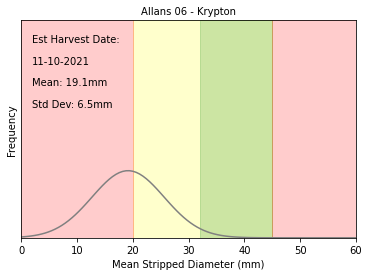

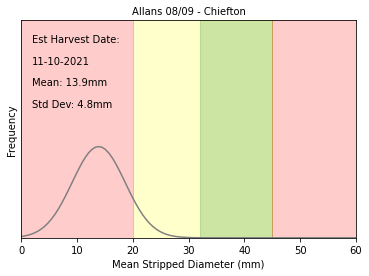

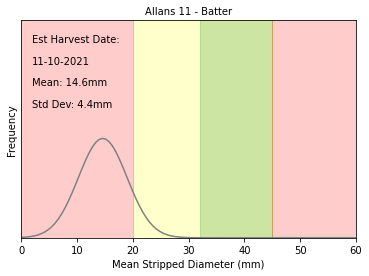

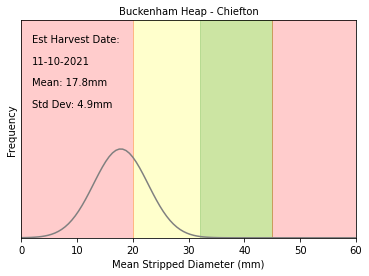

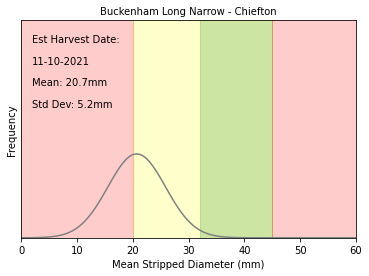

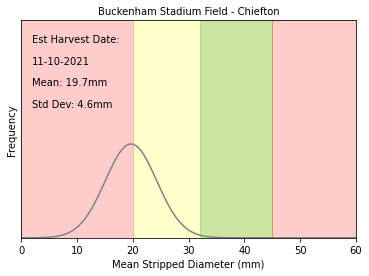

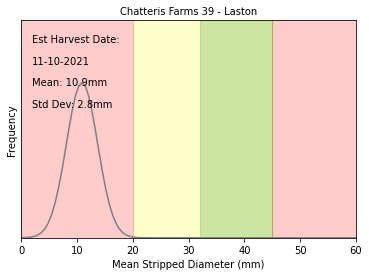

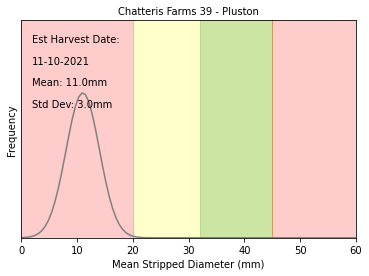

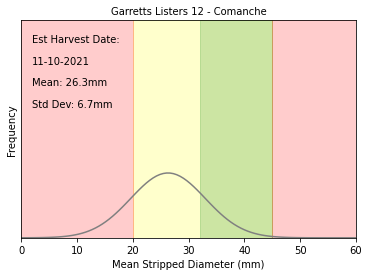

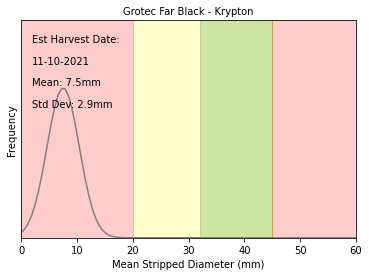

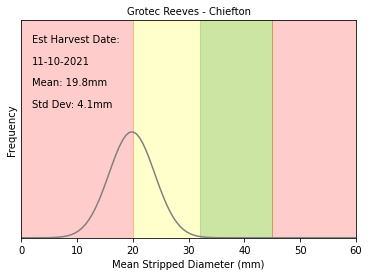

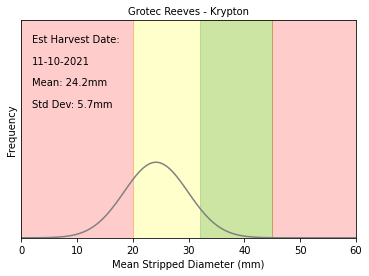

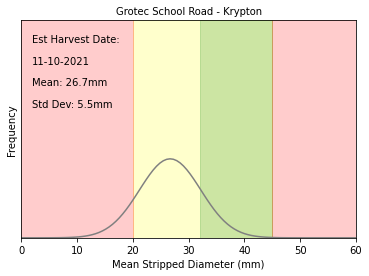

c:\users\tom\appdata\local\programs\python\python39\lib\site-packages\scipy\stats\_distn_infrastructure.py:1835: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
c:\users\tom\appdata\local\programs\python\python39\lib\site-packages\scipy\stats\_distn_infrastructure.py:1835: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


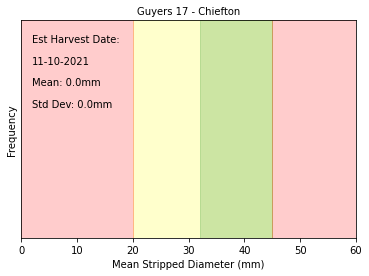

c:\users\tom\appdata\local\programs\python\python39\lib\site-packages\scipy\stats\_distn_infrastructure.py:1835: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
c:\users\tom\appdata\local\programs\python\python39\lib\site-packages\scipy\stats\_distn_infrastructure.py:1835: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


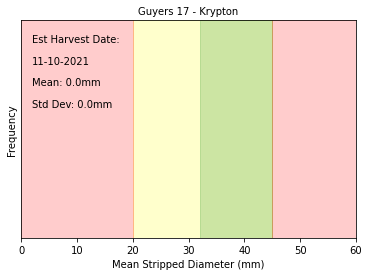

c:\users\tom\appdata\local\programs\python\python39\lib\site-packages\scipy\stats\_distn_infrastructure.py:1835: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
c:\users\tom\appdata\local\programs\python\python39\lib\site-packages\scipy\stats\_distn_infrastructure.py:1835: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


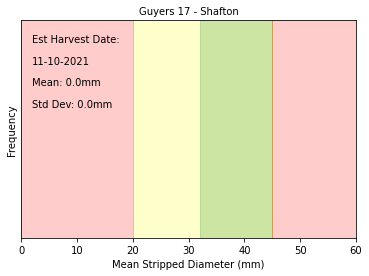

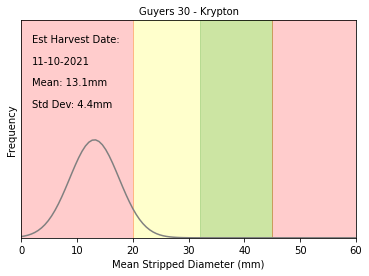

c:\users\tom\appdata\local\programs\python\python39\lib\site-packages\scipy\stats\_distn_infrastructure.py:1835: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
c:\users\tom\appdata\local\programs\python\python39\lib\site-packages\scipy\stats\_distn_infrastructure.py:1835: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


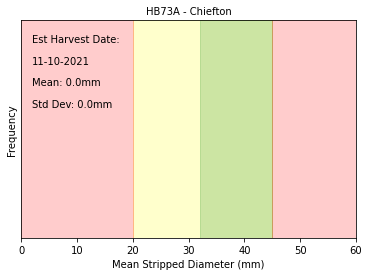

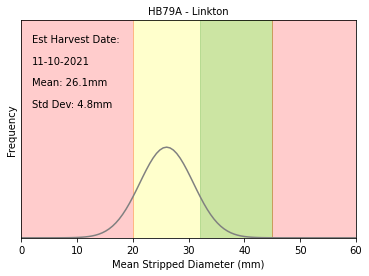

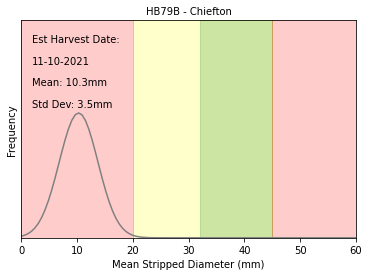

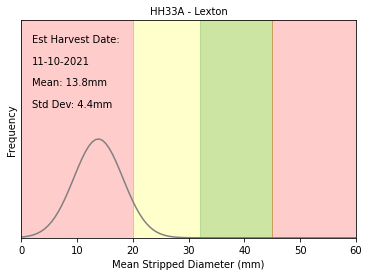

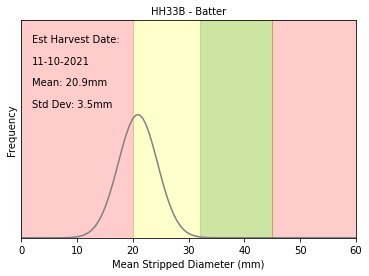

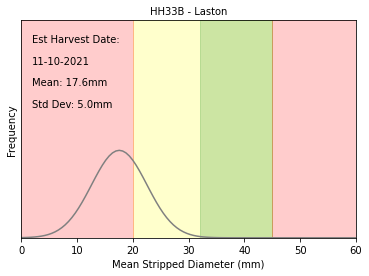

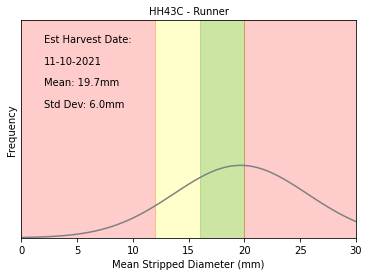

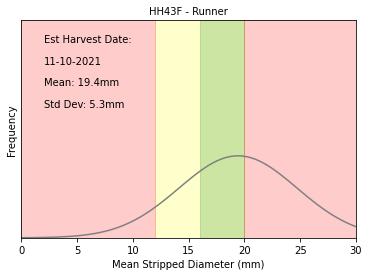

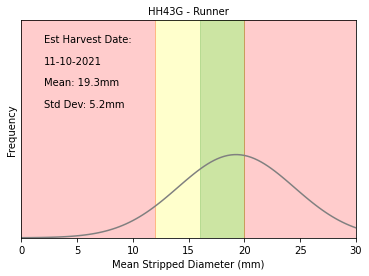

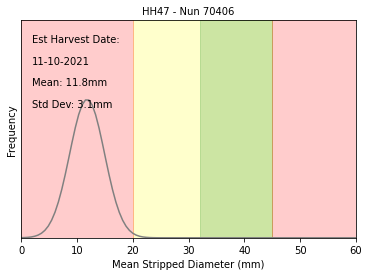

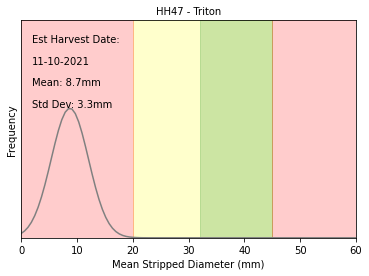

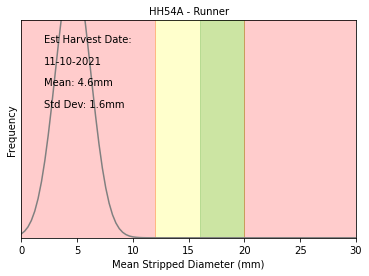

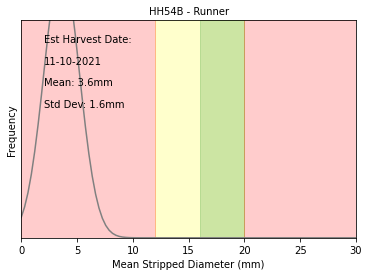

c:\users\tom\appdata\local\programs\python\python39\lib\site-packages\scipy\stats\_distn_infrastructure.py:1835: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
c:\users\tom\appdata\local\programs\python\python39\lib\site-packages\scipy\stats\_distn_infrastructure.py:1835: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


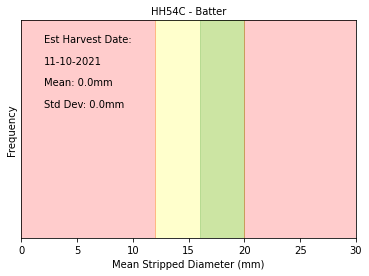

c:\users\tom\appdata\local\programs\python\python39\lib\site-packages\scipy\stats\_distn_infrastructure.py:1835: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
c:\users\tom\appdata\local\programs\python\python39\lib\site-packages\scipy\stats\_distn_infrastructure.py:1835: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


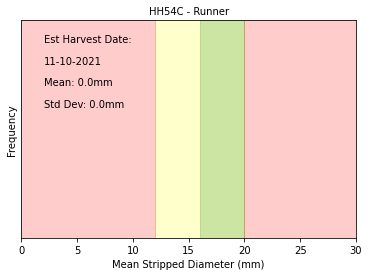

c:\users\tom\appdata\local\programs\python\python39\lib\site-packages\scipy\stats\_distn_infrastructure.py:1835: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
c:\users\tom\appdata\local\programs\python\python39\lib\site-packages\scipy\stats\_distn_infrastructure.py:1835: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


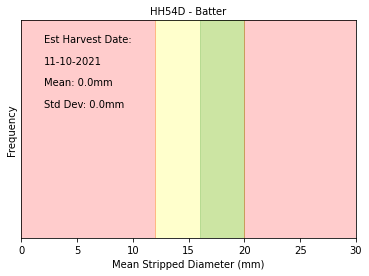

c:\users\tom\appdata\local\programs\python\python39\lib\site-packages\scipy\stats\_distn_infrastructure.py:1835: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
c:\users\tom\appdata\local\programs\python\python39\lib\site-packages\scipy\stats\_distn_infrastructure.py:1835: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


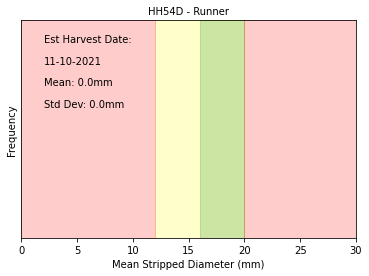

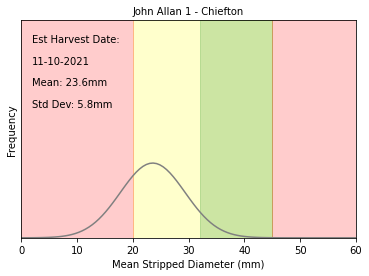

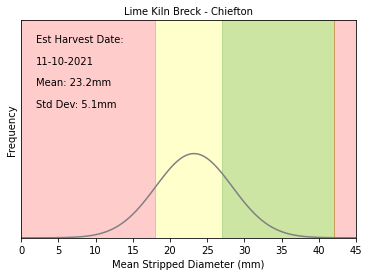

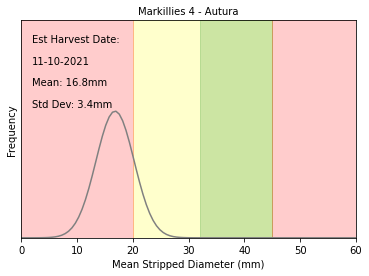

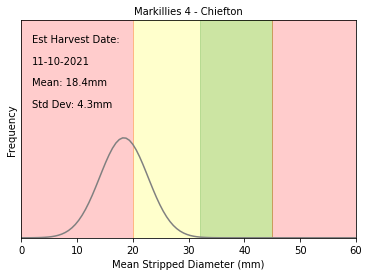

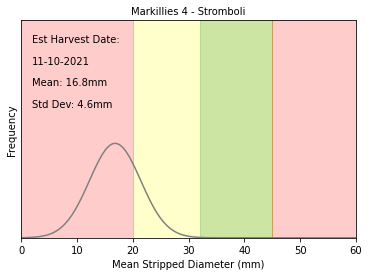

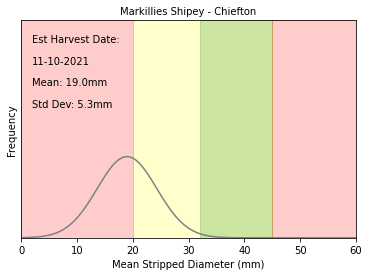

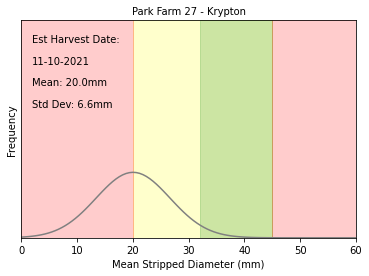

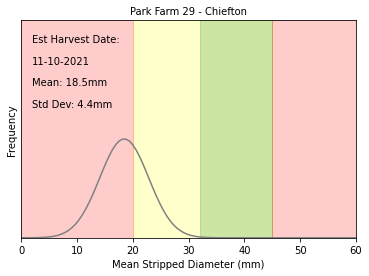

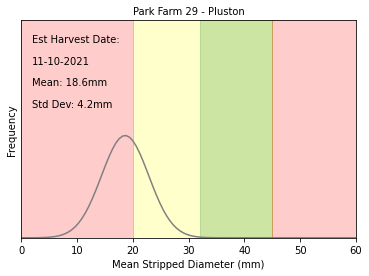

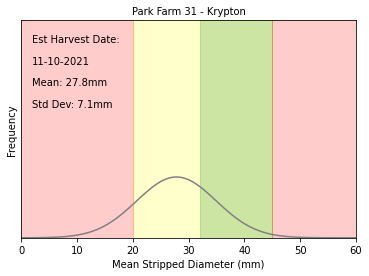

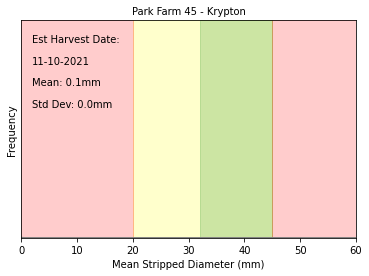

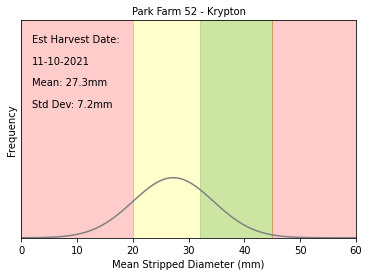

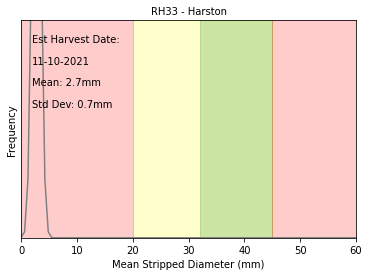

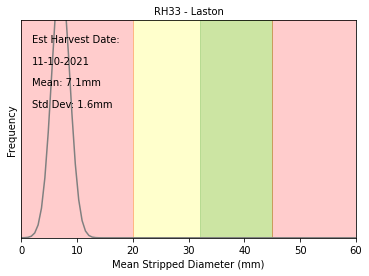

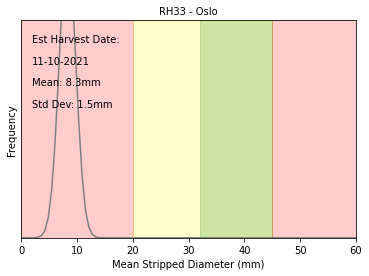

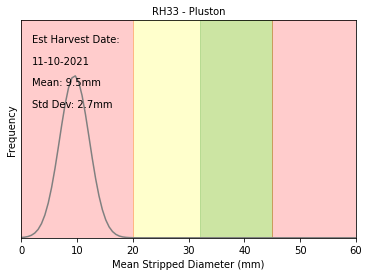

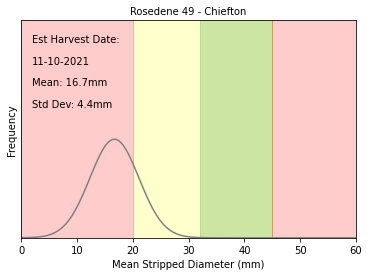

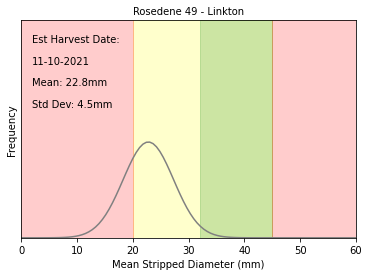

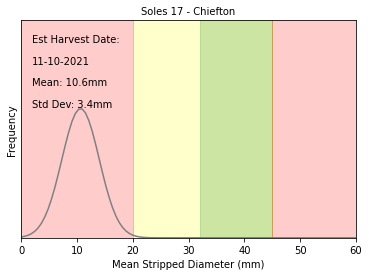

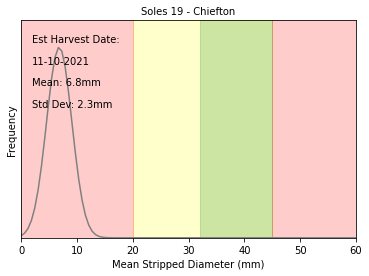

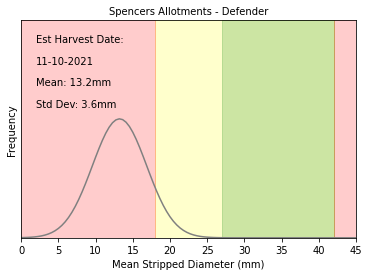

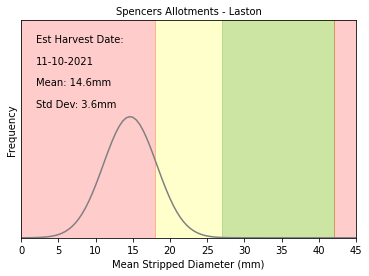

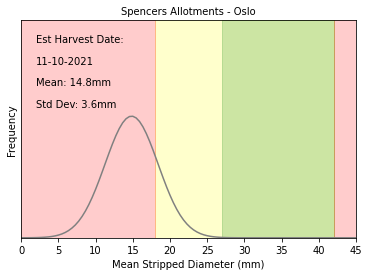

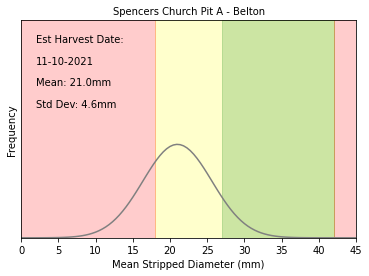

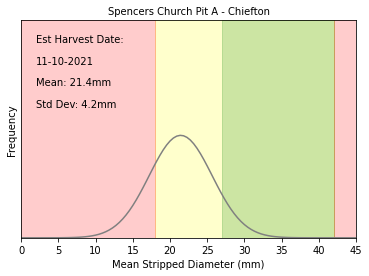

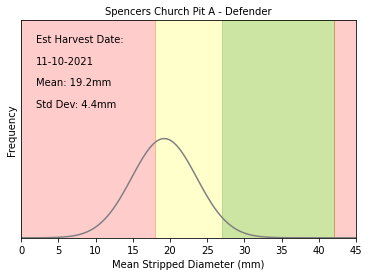

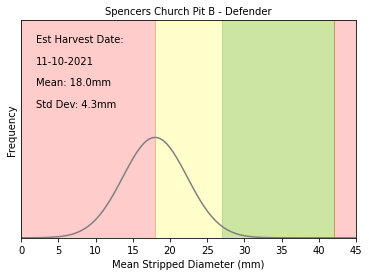

c:\users\tom\appdata\local\programs\python\python39\lib\site-packages\scipy\stats\_distn_infrastructure.py:1835: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
c:\users\tom\appdata\local\programs\python\python39\lib\site-packages\scipy\stats\_distn_infrastructure.py:1835: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


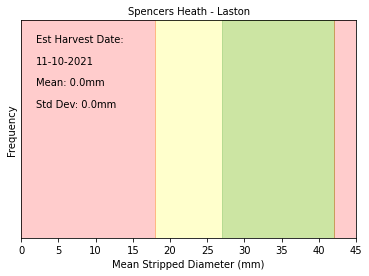

c:\users\tom\appdata\local\programs\python\python39\lib\site-packages\scipy\stats\_distn_infrastructure.py:1835: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
c:\users\tom\appdata\local\programs\python\python39\lib\site-packages\scipy\stats\_distn_infrastructure.py:1835: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


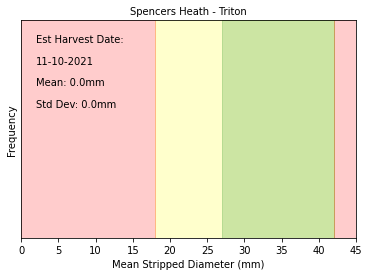

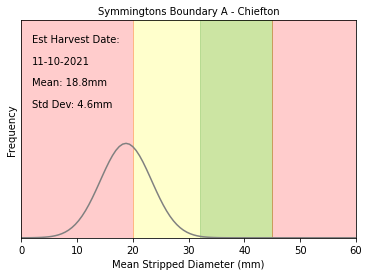

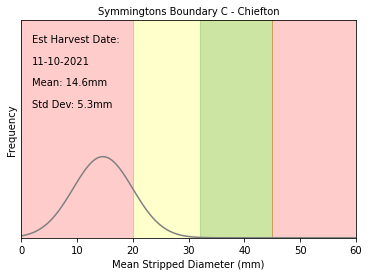

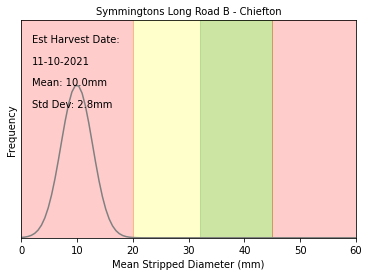

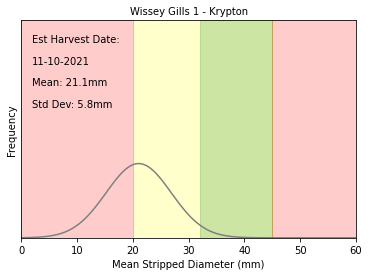

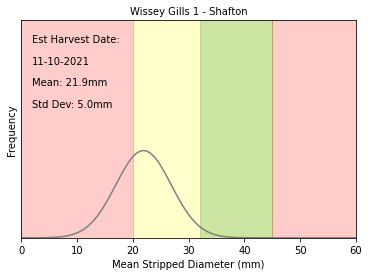

In [1]:
%run LinearRegressionCustom.ipynb

In [2]:
field_data = zone_data
field_data['establishment'] = (field_data['mean_pp2m2']/2*10000)/field_data['planting_rate']

In [3]:
summary_data.head()

,fieldzone,sample_date,field,zone,diameter,stripped_diameter,fieldzonedate,planting_date,variety,method,inputs,protection,planting_rate,sand,silt,clay,organic_matter,harvest_date,fieldvariety,fieldvarietydate,heat_units,solar_radiation
0,Allans 06 - 1,2021-07-29,Allans 06,1,13.0,11.96,Allans 06 - 1 - 2021-07-29,2021-04-10,Krypton,Drilled,Conventional,Barley,262270.0,40.0,41.0,19.0,24.6,NaT,Allans 06 - Krypton,Allans 06 - Krypton - 2021-07-29,0,0
1,Allans 06 - 1,2021-07-29,Allans 06,1,14.0,12.88,Allans 06 - 1 - 2021-07-29,2021-04-10,Krypton,Drilled,Conventional,Barley,262270.0,40.0,41.0,19.0,24.6,NaT,Allans 06 - Krypton,Allans 06 - Krypton - 2021-07-29,0,0
2,Allans 06 - 1,2021-07-29,Allans 06,1,8.0,7.36,Allans 06 - 1 - 2021-07-29,2021-04-10,Krypton,Drilled,Conventional,Barley,262270.0,40.0,41.0,19.0,24.6,NaT,Allans 06 - Krypton,Allans 06 - Krypton - 2021-07-29,0,0
3,Allans 06 - 1,2021-07-29,Allans 06,1,10.0,9.20,Allans 06 - 1 - 2021-07-29,2021-04-10,Krypton,Drilled,Conventional,Barley,262270.0,40.0,41.0,19.0,24.6,NaT,Allans 06 - Krypton,Allans 06 - Krypton - 2021-07-29,0,0
4,Allans 06 - 1,2021-07-29,Allans 06,1,7.0,6.44,Allans 06 - 1 - 2021-07-29,2021-04-10,Krypton,Drilled,Conventional,Barley,262270.0,40.0,41.0,19.0,24.6,NaT,Allans 06 - Krypton,Allans 06 - Krypton - 2021-07-29,0,0


In [4]:
summary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120685 entries, 0 to 120684
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   fieldzone          120685 non-null  object        
 1   sample_date        120685 non-null  datetime64[ns]
 2   field              120685 non-null  object        
 3   zone               120685 non-null  object        
 4   diameter           120685 non-null  float64       
 5   stripped_diameter  120685 non-null  float64       
 6   fieldzonedate      120685 non-null  object        
 7   planting_date      120123 non-null  datetime64[ns]
 8   variety            120123 non-null  object        
 9   method             120123 non-null  object        
 10  inputs             120123 non-null  object        
 11  protection         120123 non-null  object        
 12  planting_rate      120123 non-null  float64       
 13  sand               120123 non-null  float64 

In [5]:
field_data.head()

,field,zone,planting_date,variety,method,inputs,protection,planting_rate,sand,silt,clay,organic_matter,harvest_date,fieldzone,fieldvariety,mean_pp2m2,max_sample_date,max_mean_diameter_lin,max_std_dev_diameter_lin,max_heat,max_solar,remaining_heat,remaining_solar,est_mean_diameter_gain,est_std_dev_diameter_gain,est_mean_diameter,est_std_dev_diameter,field_variety,establishment
0,Allans 07,1,2019-04-01,Krypton,Drilled,Conventional,Barley,249820,39,37,24,29.6,2019-12-15,Allans 07 - 1,Allans 07 - Krypton,44.333333,2019-10-29 00:00:00,12.057603,4.049213,94.0,1665359.0,140.457304,2.424302e+06,18.930644,6.198043,134.983730,27.779546,Allans 07 - Krypton,0.887306
1,Allans 07,2,2019-04-01,Krypton,Drilled,Conventional,Barley,249820,39,37,24,29.6,2019-12-15,Allans 07 - 2,Allans 07 - Krypton,44.333333,2019-10-29 00:00:00,10.628790,4.253162,94.0,1665359.0,140.457304,2.424302e+06,18.930644,6.198043,126.181139,28.572742,Allans 07 - Krypton,0.887306
2,Allans 07,3,2019-04-01,Longton,Drilled,Conventional,Barley,256524,39,37,24,29.6,2019-12-15,Allans 07 - 3,Allans 07 - Longton,44.500000,2020-01-13 00:00:00,10.492447,3.275279,106.0,1759474.0,128.233172,2.331232e+06,21.626793,3.701892,142.076351,16.041916,Allans 07 - Longton,0.867365
3,Allans 07,4,2019-04-01,Longton,Drilled,Conventional,Barley,256524,39,37,24,29.6,2019-12-15,Allans 07 - 4,Allans 07 - Longton,45.750000,2020-01-13 00:00:00,11.007780,3.895825,106.0,1759474.0,128.233172,2.331232e+06,21.626793,3.701892,145.343983,18.118354,Allans 07 - Longton,0.891729
4,Allans 07,5,2019-04-01,Batter,Drilled,Conventional,Barley,247048,39,37,24,29.6,2019-12-15,Allans 07 - 5,Allans 07 - Batter,44.333333,2020-01-20 00:00:00,10.594321,3.858531,107.0,1768987.0,127.823574,2.321325e+06,13.437351,3.921438,93.874701,18.742416,Allans 07 - Batter,0.897262


In [6]:
field_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755 entries, 0 to 754
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   field                      755 non-null    object        
 1   zone                       755 non-null    int32         
 2   planting_date              755 non-null    datetime64[ns]
 3   variety                    755 non-null    object        
 4   method                     755 non-null    object        
 5   inputs                     755 non-null    object        
 6   protection                 755 non-null    object        
 7   planting_rate              755 non-null    int64         
 8   sand                       755 non-null    int64         
 9   silt                       755 non-null    int64         
 10  clay                       755 non-null    int64         
 11  organic_matter             755 non-null    float64       
 12  harvest_

In [7]:
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams["savefig.jpeg_quality"] = 75
plt.rcParams["savefig.format"] = 'jpeg'

<ipython-input-7-bfc092efb67f>:2: MatplotlibDeprecationWarning: 
The savefig.jpeg_quality rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  plt.rcParams["savefig.jpeg_quality"] = 75


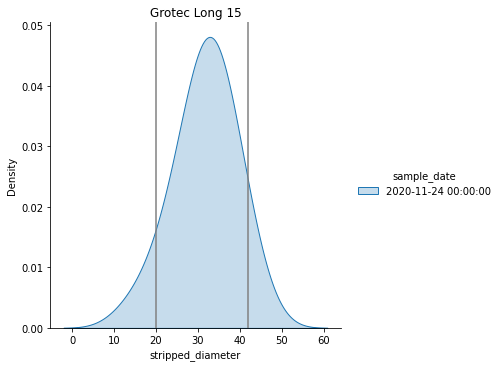

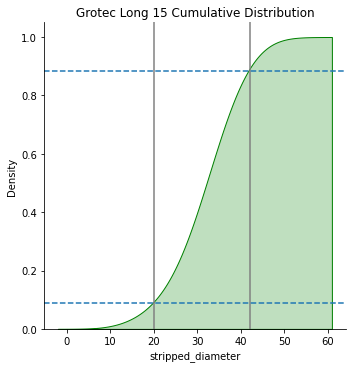

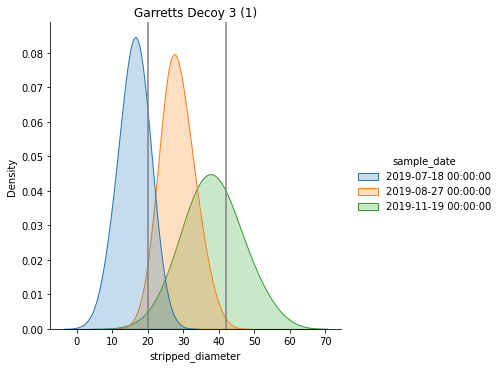

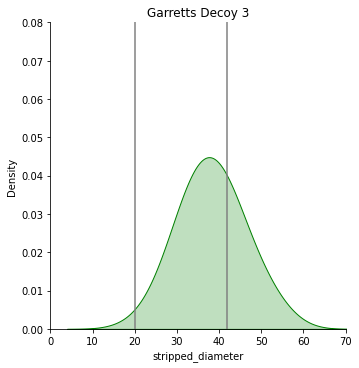

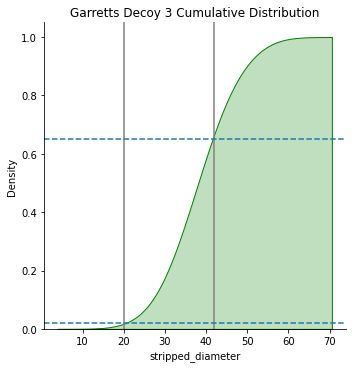

In [8]:
df = summary_data.query('field == "Grotec Long 15"')
df = df[df['sample_date'].isin(['03/08/2020', '11/09/2020', '24/11/2020'])]
sns.displot(df, x="stripped_diameter", hue="sample_date", kind="kde", fill=True, bw_adjust=2, common_norm=False)
plt.axvline(x=20, color='grey')
plt.axvline(x=42, color='grey')
name = 'Grotec Long 15'
plt.title(name)
plt.show()

df = summary_data.query('field == "Grotec Long 15"')
df = df[df['sample_date'].isin(['24/11/2020'])]
sns.displot(df, x="stripped_diameter", kind="kde", color='g', fill=True, bw_adjust=2, cumulative=True)
plt.axvline(x=20, color='grey')
plt.axvline(x=42, color='grey')
plt.axhline(0.09, ls='--')
plt.axhline(0.885, ls='--')
name = 'Grotec Long 15 Cumulative Distribution'
plt.title(name)
plt.show()

df = summary_data.query('field == "Garretts Decoy 3"')
sns.displot(df, x="stripped_diameter", hue="sample_date", kind="kde", fill=True, bw_adjust=2, common_norm=False)
plt.axvline(x=20, color='grey')
plt.axvline(x=42, color='grey')
name = 'Garretts Decoy 3 (1)'
plt.title(name)
plt.show()

df = summary_data.query('field == "Garretts Decoy 3"')
df = df[df['sample_date'].isin(['19/11/2019'])]
sns.displot(df, x="stripped_diameter", kind="kde", color='g', fill=True, bw_adjust=2, common_norm=False)
plt.axvline(x=20, color='grey')
plt.axvline(x=42, color='grey')
plt.xlim(0, 70)
plt.ylim(0, 0.08)
name = 'Garretts Decoy 3'
plt.title(name)
plt.show()

df = summary_data.query('field == "Garretts Decoy 3"')
df = df[df['sample_date'].isin(['19/11/2019'])]
sns.displot(df, x="stripped_diameter", kind="kde", color='g', fill=True, bw_adjust=2, cumulative=True)
plt.axvline(x=20, color='grey')
plt.axvline(x=42, color='grey')
plt.axhline(0.02, ls='--')
plt.axhline(0.65, ls='--')
name = "Garretts Decoy 3 Cumulative Distribution"
plt.title(name)
plt.show()

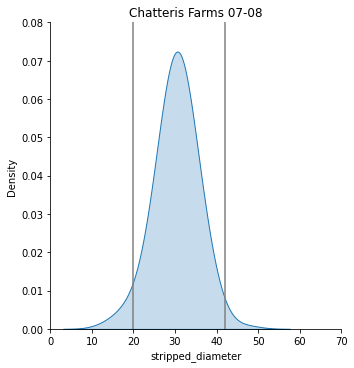

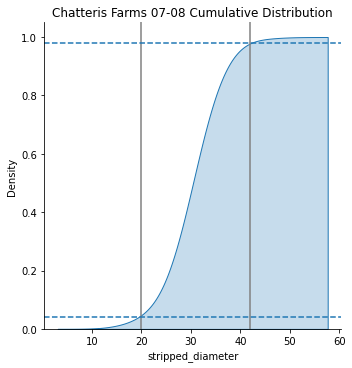

In [9]:
df = summary_data.query('field == "Chatteris Farms 07/08" & sample_date == "24/11/2020"')
sns.displot(df, x="stripped_diameter", kind="kde", fill=True, bw_adjust=2, cumulative = False)
plt.axvline(x=20, color='grey')
plt.axvline(x=42, color='grey')
plt.xlim(0, 70)
plt.ylim(0, 0.08)
name = 'Chatteris Farms 07-08'
plt.title(name)
plt.show()


df = summary_data.query('field == "Chatteris Farms 07/08" & sample_date == "24/11/2020"')
sns.displot(df, x="stripped_diameter", kind="kde", fill=True, bw_adjust=2, cumulative = True)
plt.axvline(x=20, color='grey')
plt.axvline(x=42, color='grey')
plt.axhline(0.04, ls='--')
plt.axhline(0.98, ls='--')
name = 'Chatteris Farms 07-08 Cumulative Distribution'
plt.title(name)
plt.show()

In [39]:
def conventional_comparison(field_list, date_list):
    df = summary_data[summary_data['field'].isin(field_list)]
    df = df[df['sample_date'].isin(date_list)]
    sns.displot(df, x="stripped_diameter", hue="fieldvarietydate", kind="kde", fill=True, bw_adjust=2, common_norm=False)
    plt.axvline(x=20, color='grey')
    plt.axvline(x=45, color='grey')
    name = 'Conventional Comparison'
    plt.title(name)
    plt.savefig(name)
    plt.show()
    
def baby_comparison(field_list, date_list):
    df = summary_data[summary_data['field'].isin(field_list)]
    df = df[df['sample_date'].isin(date_list)]
    sns.displot(df, x="stripped_diameter", hue="fieldvarietydate", kind="kde", fill=True, bw_adjust=2, common_norm=False)
    plt.axvline(x=12, color='grey')
    plt.axvline(x=20, color='grey')
    name = 'Baby Comparison'
    plt.title(name)
    plt.savefig(name)
    plt.show()
    
def organic_comparison(field_list, date_list):
    df = summary_data[summary_data['field'].isin(field_list)]
    df = df[df['sample_date'].isin(date_list)]
    sns.displot(df, x="stripped_diameter", hue="fieldvarietydate", kind="kde", fill=True, bw_adjust=2, common_norm=False)
    plt.axvline(x=18, color='grey')
    plt.axvline(x=42, color='grey')
    name = 'Organic Comparison'
    plt.title(name)
    plt.savefig(name)
    plt.show()
    

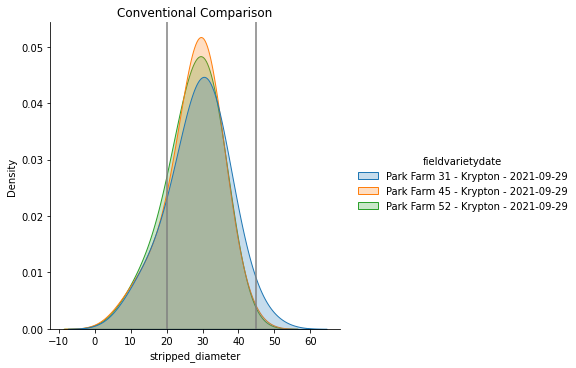

In [42]:
field_list = ['Park Farm 31', 'Park Farm 45', 'Park Farm 52']
date_list = ['2021-09-29']

conventional_comparison(field_list, date_list)

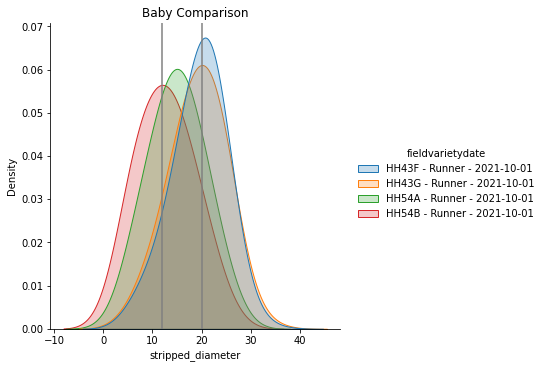

In [43]:
field_list = ['HH43F', 'HH43G', 'HH54A', 'HH54B']
date_list = ['2021-10-01']

baby_comparison(field_list, date_list)